## The Sparks Foundation - Data Science & Business Analytics Internship

## Task 1 - Prediction using Supervised ML

#### A simple linear regression task to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

#### Dataset Link: http://bit.ly/w-data

#### Batch: January 2022

## Author: Ezekiel Olaoluwa Oladiran

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset from remote link
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The information above shows there are 2 columns, 25 entries and no null entry.

Text(0, 0.5, 'Percentage Score')

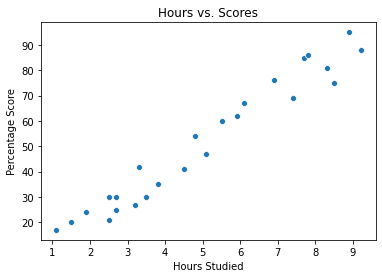

In [6]:
#plotting the distribution of the scores
sns.scatterplot(x = "Hours", y = "Scores", data = data)
plt.title("Hours vs. Scores")
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")  

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

The next step is to divide the data into input (X) and output (y)

In [16]:
X = data[['Hours']].values
y = data[['Scores']].values

### Train and Test Sets

In [9]:
#importing train_test_split from Scikit Learn library
from sklearn.model_selection import train_test_split

In [76]:
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the data

In [11]:
#importing linear regression model
from sklearn.linear_model import LinearRegression

In [77]:
#training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Training complete!

### Plotting the regression line

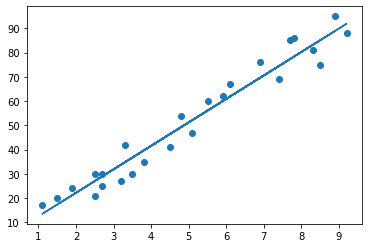

In [78]:
line = model.coef_ *X + model.intercept_
plt.scatter(X, y)
plt.plot(X, line)

### Making Predictions

Now, we make predictions based on the trained model.

In [79]:
print(X_test) #Testing data (Hours)
predictions = model.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [80]:
#comparing actual and predictions
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Evaluating the model

To evaluate the performance of the algorithm, we'll be using mean square error.

In [81]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 3.9207511902099244


### Predict the score for a student that studies for 9.25 hours/day

In [114]:
hour = np.array(9.25).reshape(-1, 1)
pred = model.predict(hour)
print('The score if a student studies for 9.25 hours is', pred[0,0])

The score if a student studies for 9.25 hours is 92.38611528261494
